In [91]:
#libraries
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns

In [92]:
#import Min Max Temperature (already formatted in Excel)

MinMax = pd.read_csv('Min Max Temp.csv')
MinMax

,Product code,Bureau of Meteorology station number,Year,Month,Day,Day of the Year,Day of the Week,Minimum temperature (Degree C),Maximum temperature (Degree C)
0,IDCJAC0010,86338,2015,1,1,1,Thursday,13.3,26.9
1,IDCJAC0010,86338,2015,1,2,2,Friday,15.4,38.8
2,IDCJAC0010,86338,2015,1,3,3,Saturday,20.0,38.2
3,IDCJAC0010,86338,2015,1,4,4,Sunday,16.3,21.4
4,IDCJAC0010,86338,2015,1,5,5,Monday,15.0,22.0
...,...,...,...,...,...,...,...,...,...
2284,IDCJAC0010,86338,2021,4,3,93,Saturday,15.1,31.6
2285,IDCJAC0010,86338,2021,4,4,94,Sunday,15.2,24.5
2286,IDCJAC0010,86338,2021,4,5,95,Monday,16.0,19.0
2287,IDCJAC0010,86338,2021,4,6,96,Tuesday,12.8,20.2


In [93]:
MinMax.shape

(2289, 9)

In [94]:
MinMax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289 entries, 0 to 2288
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Product code                          2289 non-null   object 
 1   Bureau of Meteorology station number  2289 non-null   int64  
 2   Year                                  2289 non-null   int64  
 3   Month                                 2289 non-null   int64  
 4   Day                                   2289 non-null   int64  
 5   Day of the Year                       2289 non-null   int64  
 6   Day of the Week                       2289 non-null   object 
 7   Minimum temperature (Degree C)        2289 non-null   float64
 8   Maximum temperature (Degree C)        2289 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 161.1+ KB


In [95]:
#Check for missing values

MinMax.isnull().sum()

Product code                            0
Bureau of Meteorology station number    0
Year                                    0
Month                                   0
Day                                     0
Day of the Year                         0
Day of the Week                         0
Minimum temperature (Degree C)          0
Maximum temperature (Degree C)          0
dtype: int64

In [96]:
#Delete columns that are irrelevant for prediction

MinMax = MinMax.drop(columns = ["Product code", "Bureau of Meteorology station number"])
MinMax.shape

(2289, 7)

In [97]:
#Rename min and max columns for easier coding

MinMax = MinMax.rename(columns = {'Minimum temperature (Degree C)': 'Min'})
MinMax = MinMax.rename(columns = {'Maximum temperature (Degree C)': 'Max'})
MinMax


,Year,Month,Day,Day of the Year,Day of the Week,Min,Max
0,2015,1,1,1,Thursday,13.3,26.9
1,2015,1,2,2,Friday,15.4,38.8
2,2015,1,3,3,Saturday,20.0,38.2
3,2015,1,4,4,Sunday,16.3,21.4
4,2015,1,5,5,Monday,15.0,22.0
...,...,...,...,...,...,...,...
2284,2021,4,3,93,Saturday,15.1,31.6
2285,2021,4,4,94,Sunday,15.2,24.5
2286,2021,4,5,95,Monday,16.0,19.0
2287,2021,4,6,96,Tuesday,12.8,20.2


In [98]:
#Test for predictive values of columns
from scipy import stats
a = MinMax['Day']
b = MinMax['Min']
c = MinMax['Max']
print("r value (Min) is:", stats.pearsonr(a,b)[0])
print("r value (Max) is:", stats.pearsonr(a,c)[0])

r value (Min) is: -0.009218111769541591
r value (Max) is: -0.010700769733552119


In [99]:
#Test for predictive values of columns
a = MinMax['Day of the Year']
b = MinMax['Min']
c = MinMax['Max']
print("r value (Min) is:", stats.pearsonr(a,b)[0])
print("r value (Max) is:", stats.pearsonr(a,c)[0])

r value (Min) is: -0.28855363275401014
r value (Max) is: -0.19512225024695978


In [100]:
#Test for predictive values of columns
a = MinMax['Year']
b = MinMax['Min']
c = MinMax['Max']
print("r value (Min) is:", stats.pearsonr(a,b)[0])
print("r value (Max) is:", stats.pearsonr(a,c)[0])

r value (Min) is: 0.031119063230355272
r value (Max) is: 0.034747609209749716


In [101]:
a = MinMax['Month']
b = MinMax['Min']
c = MinMax['Max']
print("r value (Min) is:", stats.pearsonr(a,b)[0])
print("r value (Max) is:", stats.pearsonr(a,c)[0])

r value (Min) is: -0.2910706019009437
r value (Max) is: -0.19692108832941452


#### Day of the Month < r = |0.01| and Year < r = |0.04| consider removing for better prediction. 

In [49]:
MinMax['Day'] = MinMax['Day'].astype(str)
MinMax.dtypes

Year                 int64
Month                int64
Day                 object
Day of the Year      int64
Min                float64
Max                float64
dtype: object

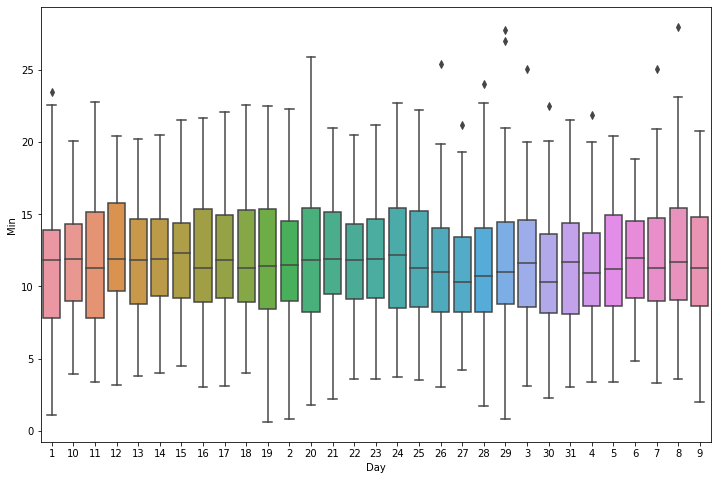

In [81]:
#Box plots of Day of Month for Minimum temperature
from matplotlib import figure

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Day', y= 'Min',data = MinMax)
plt.show()


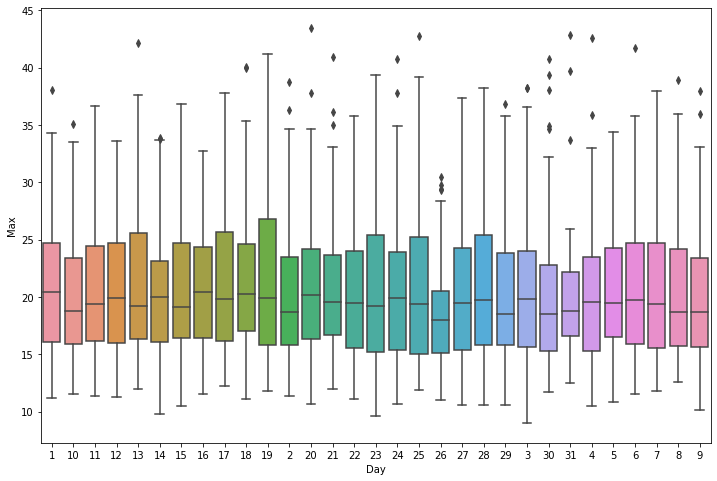

In [80]:
#Box plots of Day of Month for Maximum temperature

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Day', y= 'Max',data = MinMax)
plt.show()

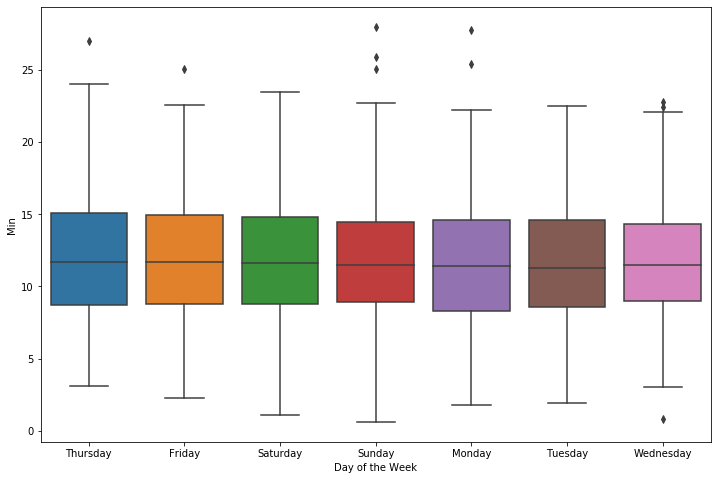

In [103]:
#Box plots of Day of the Week for Minimum temperature

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Day of the Week', y= 'Min',data = MinMax)
plt.show()

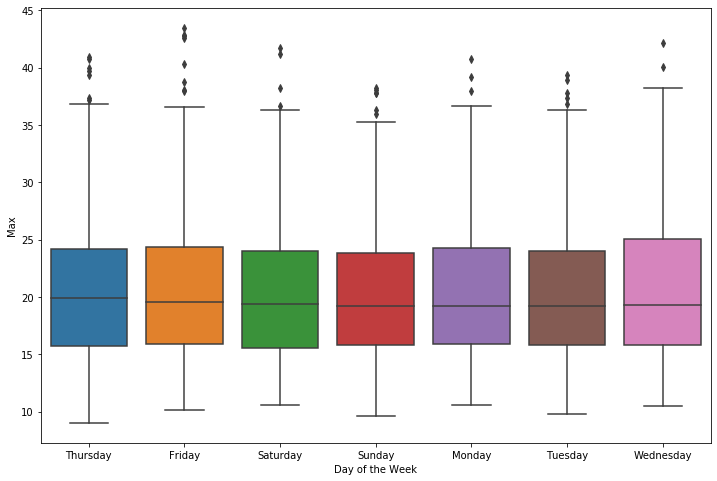

In [104]:
#Box plots of Day of the Week for Maximum temperature

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Day of the Week', y= 'Max',data = MinMax)
plt.show()

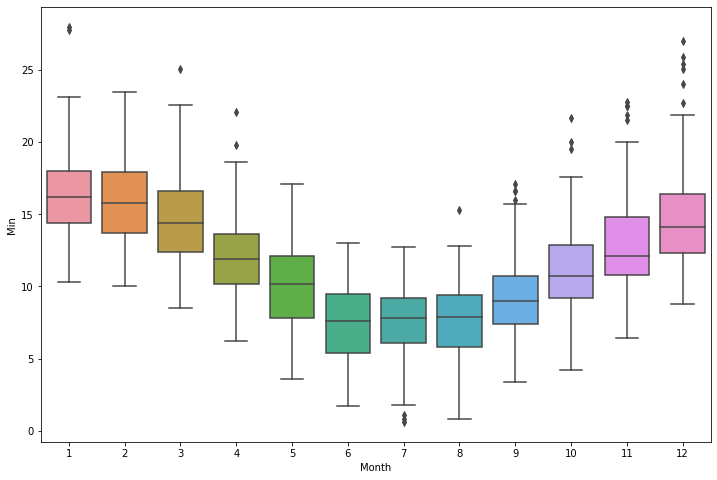

In [79]:
#Box plots of Month for Minumum temperature

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Month', y= 'Min',data = MinMax)
plt.show()


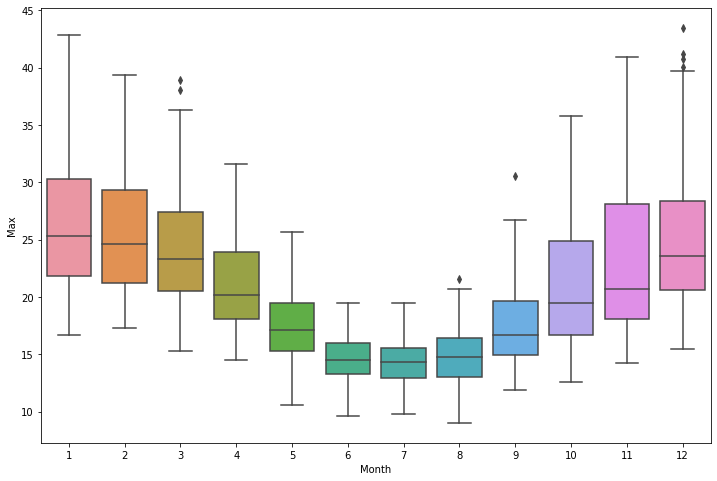

In [82]:
#Box plots of Month for Minumum temperature

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Month', y= 'Max',data = MinMax)
plt.show()

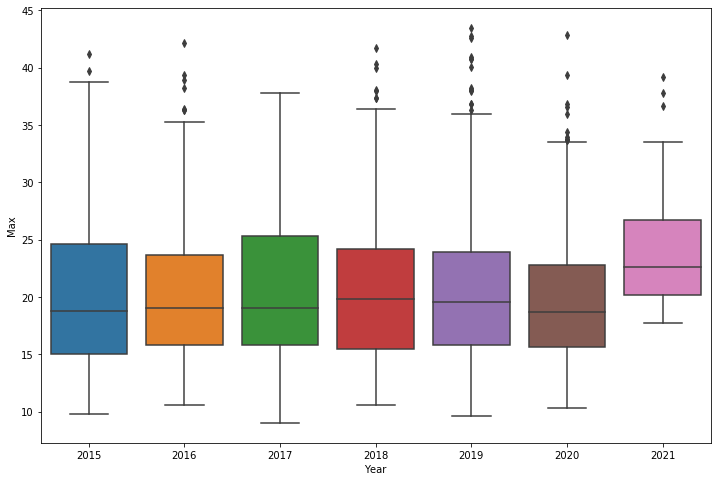

In [74]:
#Box plots of Year for Max temperature

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Year', y= 'Max',data = MinMax)

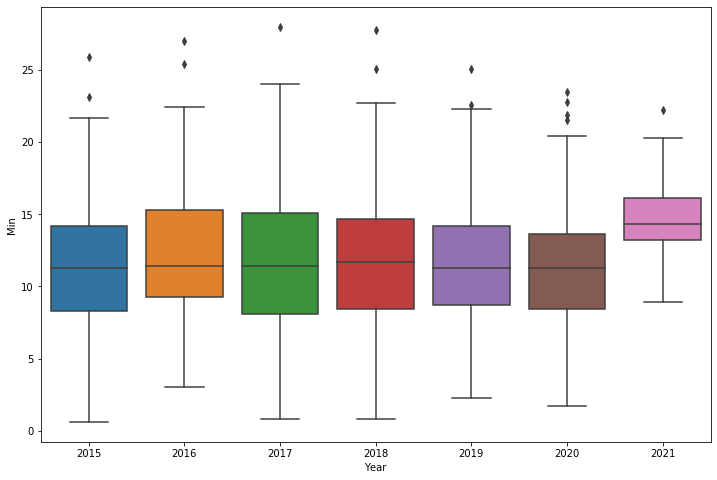

In [84]:
#Box plots of Year for Minumum temperature

plt.figure(figsize=(12,8))
sns.boxplot(x = 'Year', y = 'Min', data = MinMax)
plt.show()

#### Day of the Week, Day of the Month do not show any identifiable differences consider removing before predicting.  Month does have a clear trend. Year has more variation in the extreames. 

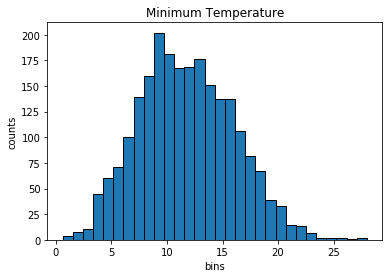

<Figure size 432x288 with 0 Axes>

In [78]:
#Histogram of Minimum Temperature

plt.hist(MinMax['Min'], edgecolor = 'black', bins=30)
plt.title('Minimum Temperature')
plt.xlabel('bins')
plt.ylabel('counts')
plt.show()
plt.clf()




In [89]:
#Summary Statistics

MinMax['Min'].describe()

count    2289.000000
mean       11.753997
std         4.257914
min         0.600000
25%         8.700000
50%        11.500000
75%        14.700000
max        28.000000
Name: Min, dtype: float64

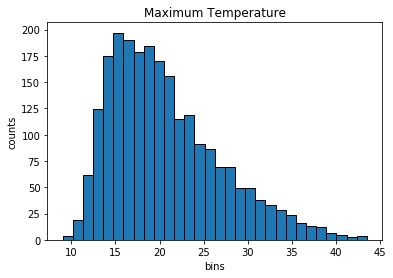

<Figure size 432x288 with 0 Axes>

In [87]:
#Histogram of Maximum Temperature

plt.hist(MinMax['Max'], edgecolor = 'black', bins=30)
plt.title('Maximum Temperature')
plt.xlabel('bins')
plt.ylabel('counts')
plt.show()
plt.clf()

In [90]:
#Summary Statistics

MinMax['Max'].describe()

count    2289.000000
mean       20.632591
std         6.251114
min         9.000000
25%        15.800000
50%        19.400000
75%        24.300000
max        43.500000
Name: Max, dtype: float64

### From the two histograms we can see that the Minimum temperatures have a bell shape but Max temperature is positively skewed

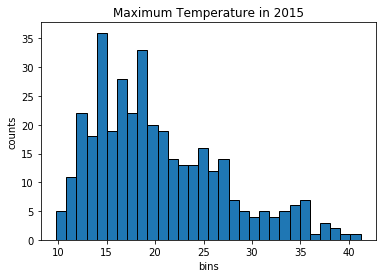

<Figure size 432x288 with 0 Axes>

In [130]:
#Histogram by Year

plt.hist(MinMax['Max'].iloc[0:366], edgecolor = 'black', bins=30)
plt.title('Maximum Temperature in 2015')
plt.xlabel('bins')
plt.ylabel('counts')
plt.show()
plt.clf()

In [124]:
#Histogram by Year 2016

plt.hist(MinMax['Max'].iloc[367:366], edgecolor = 'black', bins=30)
plt.title('Maximum Temperature in 2015')
plt.xlabel('bins')
plt.ylabel('counts')
plt.show()
plt.clf()

,Year,Month,Day,Day of the Year,Day of the Week,Min,Max
0,2015,1,1,1,Thursday,13.3,26.9
1,2015,1,2,2,Friday,15.4,38.8
2,2015,1,3,3,Saturday,20.0,38.2
3,2015,1,4,4,Sunday,16.3,21.4
4,2015,1,5,5,Monday,15.0,22.0
...,...,...,...,...,...,...,...
2284,2015,4,3,93,Saturday,15.1,31.6
2285,2015,4,4,94,Sunday,15.2,24.5
2286,2015,4,5,95,Monday,16.0,19.0
2287,2015,4,6,96,Tuesday,12.8,20.2
